# Binary Classification
- Classify if the note is **fraud or not** based on given features
- For Binary Classfication: `activation='sigmoid'` & `loss='binary_crossentropy'`

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Import banknote data
banknote = pd.read_csv('datasets/banknotes.csv')
banknote.head()

2023-05-25 16:48:06.159650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-25 16:48:06.159678: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
# Features and Labels
features = np.array(banknote.drop('class',axis=1), dtype=np.float32)

labels = np.array(banknote['class'],dtype = np.float32)

In [3]:
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]], dtype=float32)

In [4]:
labels

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [5]:
# Train test split
from sklearn.model_selection import train_test_split

bank_train, bank_test, class_train, class_test = train_test_split(features, labels, 
                                                                 test_size=0.3, 
                                                                 random_state=42)

In [6]:
# No. of features
n_cols = features.shape[1]
n_cols

4

In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Specify the model
bi_class_model = Sequential()

# Add hidden layer
bi_class_model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
bi_class_model.add(Dense(10, activation='relu'))

# Output layer
bi_class_model.add(Dense(1, activation='sigmoid')) #<-- sigmoid because it transforms any value in the domain to a number between 0 and 1 thus, gives probability for the likelihood of a class

# Model summary
bi_class_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


2023-05-25 16:48:08.084111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-25 16:48:08.084134: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-25 16:48:08.084155: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (83f77316-7f47-4e97-b19e-e412110ef571): /proc/driver/nvidia/version does not exist
2023-05-25 16:48:08.084370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Compile the model
bi_class_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
bi_class_model.fit(bank_train, class_train, validation_split=0.2, epochs=10)

Epoch 1/10
24/24 [==============================] - 0s 6ms/step - loss: 0.7773 - accuracy: 0.5117 - val_loss: 0.6910 - val_accuracy: 0.5729
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.6172 - val_loss: 0.5883 - val_accuracy: 0.6615
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7070 - val_loss: 0.5075 - val_accuracy: 0.7396
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.7591 - val_loss: 0.4367 - val_accuracy: 0.7760
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8008 - val_loss: 0.3746 - val_accuracy: 0.8281
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8542 - val_loss: 0.3192 - val_accuracy: 0.8958
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.9062 - val_loss: 0.2711 - val_accuracy: 0.9323
Epoch 8/10
24/24 [==

In [9]:
# Evaluate the model
bi_class_model.evaluate(bank_test, class_test)

13/13 [==============================] - 0s 800us/step - loss: 0.1768 - accuracy: 0.9587


[0.17679914832115173, 0.958737850189209]

In [10]:
# Predict on test set
class_pred = bi_class_model.predict(bank_test)
print(class_pred[10:15])

print()

# Round the probability, to get either definite answer -- the bank note is fraud or not
class_pred = np.round(class_pred)
print(class_pred[10:15])

13/13 [==============================] - 0s 664us/step
[[0.45943487]
 [0.64368415]
 [0.05699029]
 [0.85918725]
 [0.12967968]]

[[0.]
 [1.]
 [0.]
 [1.]
 [0.]]


# Multi-class Classification

## The Architecture
![image-2](image-2.png)

## Output Layer 
- The output layer has `activation = 'softmax'` which gives the probability of likelihood for all the categories which sums upto 1. From this, it's concluded that the category having the highest value is most likely the outcome.
![image-3](image-3.png)

**Note:** For Multi-class Classification: `activation='softmax'` & `loss='categorical_crossentropy'`

In [11]:
darts = pd.read_csv('datasets/darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [12]:
# Based on coordinates, identify the competitor
coord = np.array(darts.drop('competitor', axis=1), dtype=np.float32)

competitor = np.array(pd.get_dummies(darts['competitor']), dtype=np.float32)

In [13]:
coord

array([[ 0.19645147, -0.52034056],
       [ 0.47602674, -0.30676267],
       [ 0.00317496, -0.98073614],
       ...,
       [ 0.53031456, -0.833321  ],
       [-0.28725752,  0.8909278 ],
       [-0.6284028 , -0.1408676 ]], dtype=float32)

In [14]:
competitor

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [15]:
# Train - Test split
coord_train, coord_test, competitor_train, competitor_test = train_test_split(coord, competitor,
                                                                             test_size=0.3,
                                                                             random_state=42)

In [16]:
# No. of features
n_cols = coord.shape[1]
n_cols

2

In [17]:
# Specify the model
dart_model = Sequential()

# Add hidden layer
dart_model.add(Dense(128, activation='relu', input_shape=(n_cols,)))
dart_model.add(Dense(64, activation='relu'))
dart_model.add(Dense(32, activation='relu'))

# Output layer
dart_model.add(Dense(4, activation='softmax'))

# Model summary
dart_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 4)                 132       
                                                                 
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
dart_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
dart_model.fit(coord_train, competitor_train, epochs=20, validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 0s 10ms/step - loss: 1.3774 - accuracy: 0.2679 - val_loss: 1.3660 - val_accuracy: 0.3304
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 1.3503 - accuracy: 0.3683 - val_loss: 1.3419 - val_accuracy: 0.3661
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 1.3143 - accuracy: 0.4107 - val_loss: 1.3062 - val_accuracy: 0.4196
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 1.2661 - accuracy: 0.4509 - val_loss: 1.2483 - val_accuracy: 0.4464
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 1.1945 - accuracy: 0.5067 - val_loss: 1.1699 - val_accuracy: 0.5089
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 1.1161 - accuracy: 0.5580 - val_loss: 1.0911 - val_accuracy: 0.4911
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 1.0299 - accuracy: 0.5513 - val_loss: 0.9916 - val_accuracy: 0.5982
Epoch 8/20
14/14 [=

In [19]:
# Evaluate the model
dart_model.evaluate(coord_test, competitor_test)

8/8 [==============================] - 0s 845us/step - loss: 0.7964 - accuracy: 0.6500


[0.7964339852333069, 0.6499999761581421]

In [20]:
# Predict test set
competitor_pred = dart_model.predict(coord_test)
print(competitor_pred[:5])

print()

# Find the indices of the maximum values along each row
max_indices = np.argmax(competitor_pred, axis=1)

# Create a new array with all values set to 0
result = np.zeros_like(competitor_pred)

# Set the maximum value in each row to 1
result[np.arange(len(competitor_pred)), max_indices] = 1

# Print the result
print(result[:5])

8/8 [==============================] - 0s 737us/step
[[2.7432132e-01 8.8210800e-04 7.0888776e-01 1.5908882e-02]
 [2.9958989e-02 7.1177113e-01 8.2884477e-03 2.4998146e-01]
 [3.7080076e-01 6.5926835e-04 6.1313039e-01 1.5409521e-02]
 [3.1724259e-01 9.2523377e-03 5.9755820e-01 7.5946935e-02]
 [2.4905080e-01 3.1119847e-04 7.4237204e-01 8.2658902e-03]]

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


# Multi-label Classification
![image-4](image-4.png)

## Output Layer
- Since for each record, there is probability of mutiple labels to be true, the `activation='sigmoid'`, as it gives probability of likelihood for each label which can be used to conclude the true and false for each label.
![image-5](image-5.png)

**Note:** For Multi-label Classification, `activation='sigmoid'` & `loss='bainary_crossentropy'`

In [21]:
# Import Multi-label data
irrigation = pd.read_csv('datasets/irrigation_machine.csv')
irrigation.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [22]:
# Sensors and its Parcels
sensors = np.array(irrigation.drop(['Unnamed: 0','parcel_0','parcel_1','parcel_2'], axis=1), dtype=np.float32)

parcels = np.array(irrigation[['parcel_0','parcel_1','parcel_2']], dtype=np.float32)

In [23]:
sensors.shape

(2000, 20)

In [24]:
parcels.shape

(2000, 3)

In [25]:
# Train-test split
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels,
                                                                           test_size=0.3,
                                                                           random_state=42)

In [26]:
# No. of features
n_cols = sensors.shape[1]
n_cols

20

In [27]:
# Specifying the model
irrigation_model = Sequential()

# Add hidden layers
irrigation_model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
irrigation_model.add(Dense(50, activation='relu'))

# Output layer
irrigation_model.add(Dense(3, activation='sigmoid'))

# Model summary
irrigation_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                1050      
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 3)                 153       
                                                                 
Total params: 3,753
Trainable params: 3,753
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
irrigation_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
irrigation_model.fit(sensors_train, parcels_train, epochs=15, validation_split=0.2)

Epoch 1/15
35/35 [==============================] - 0s 4ms/step - loss: 0.5829 - accuracy: 0.5482 - val_loss: 0.4682 - val_accuracy: 0.5964
Epoch 2/15
35/35 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.6196 - val_loss: 0.3861 - val_accuracy: 0.6214
Epoch 3/15
35/35 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.6554 - val_loss: 0.3348 - val_accuracy: 0.5821
Epoch 4/15
35/35 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.6464 - val_loss: 0.3002 - val_accuracy: 0.6107
Epoch 5/15
35/35 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.6250 - val_loss: 0.2896 - val_accuracy: 0.6321
Epoch 6/15
35/35 [==============================] - 0s 1ms/step - loss: 0.2680 - accuracy: 0.6330 - val_loss: 0.2651 - val_accuracy: 0.5821
Epoch 7/15
35/35 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.6179 - val_loss: 0.2527 - val_accuracy: 0.5571
Epoch 8/15
35/35 [==

In [29]:
# Evaluate the model
irrigation_model.evaluate(sensors_test, parcels_test)

19/19 [==============================] - 0s 712us/step - loss: 0.2423 - accuracy: 0.6117


[0.2422914355993271, 0.6116666793823242]

In [30]:
# Predict the test set
irrigation_pred = irrigation_model.predict(sensors_test)
print(irrigation_pred[:5])

print()

# Round off the predicted probability: get definitive either a parcel is present or not
irrigation_pred = np.round(irrigation_pred)
irrigation_pred[:5]

19/19 [==============================] - 0s 632us/step
[[0.7898847  0.69599295 0.33606523]
 [0.04733665 0.12367012 0.07655379]
 [0.97900933 0.988211   0.01226033]
 [0.9669845  0.98910403 0.00335372]
 [0.99906296 0.00479214 0.00290509]]



array([[1., 1., 0.],
       [0., 0., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 0.]], dtype=float32)

# Keras Callbacks

## History callback 
- In TensorFlow, the `History` callback is a built-in callback that automatically records the training metrics at the end of each epoch during model training. It allows you to access and analyze the training history, including metrics such as loss and accuracy, for visualization or further analysis.

In [31]:
# Specifying the model
irrigation_model = Sequential()

# Add hidden layers
irrigation_model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
irrigation_model.add(Dense(50, activation='relu'))

# Output layer
irrigation_model.add(Dense(3, activation='sigmoid'))

# Model summary
irrigation_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                1050      
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 3)                 153       
                                                                 
Total params: 3,753
Trainable params: 3,753
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
irrigation_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Train your model and save its history
h_callback = irrigation_model.fit(sensors_train, parcels_train, epochs = 25,
               validation_data=(sensors_test, parcels_test))

# Extract loss and val_loss
loss = h_callback.history['loss']
val_loss = h_callback.history['val_loss']

# Extract accuracy and val_accuracy
accuracy = h_callback.history['accuracy']
val_accuracy = h_callback.history['val_accuracy']

Epoch 1/25
44/44 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.3007 - val_loss: 0.4826 - val_accuracy: 0.4583
Epoch 2/25
44/44 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.5650 - val_loss: 0.3548 - val_accuracy: 0.5750
Epoch 3/25
44/44 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.6079 - val_loss: 0.3084 - val_accuracy: 0.6150
Epoch 4/25
44/44 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.6021 - val_loss: 0.2857 - val_accuracy: 0.6583
Epoch 5/25
44/44 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.6143 - val_loss: 0.2725 - val_accuracy: 0.6417
Epoch 6/25
44/44 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.5921 - val_loss: 0.2606 - val_accuracy: 0.6467
Epoch 7/25
44/44 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.6036 - val_loss: 0.2657 - val_accuracy: 0.5783
Epoch 8/25
44/44 [==

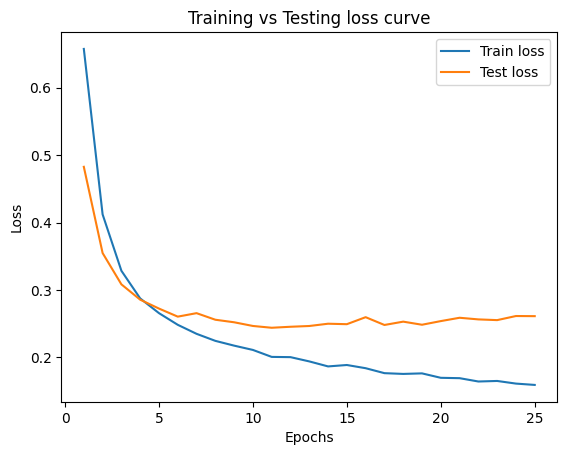

In [36]:
import matplotlib.pyplot as plt

# Plot loss curve of training and testing data
plt.plot(np.arange(1,26), loss, label='Train loss')
plt.plot(np.arange(1,26), val_loss, label='Test loss')
plt.title('Training vs Testing loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

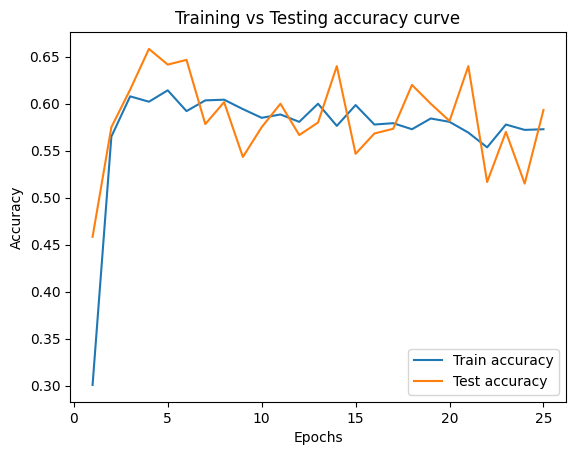

In [37]:
# Plot accuracy curve of training and testing data
plt.plot(np.arange(1,26), accuracy, label='Train accuracy')
plt.plot(np.arange(1,26), val_accuracy, label='Test accuracy')
plt.title('Training vs Testing accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Early stopping your model
- The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the `.fit()` method.

In [38]:
# Specifying the model
irrigation_model = Sequential()

# Add hidden layers
irrigation_model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
irrigation_model.add(Dense(50, activation='relu'))

# Output layer
irrigation_model.add(Dense(3, activation='sigmoid'))

In [39]:
# Compile the model
irrigation_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Instantiate EarlyStopping
monitor_val_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

# Fit the model with EarlyStopping
irrigation_model.fit(sensors_train, parcels_train,
                    epochs=50,
                    validation_data=(sensors_test, parcels_test),
                    callbacks=[monitor_val_accuracy])

Epoch 1/50
44/44 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.4557 - val_loss: 0.4161 - val_accuracy: 0.5600
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.5714 - val_loss: 0.3425 - val_accuracy: 0.6600
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.5986 - val_loss: 0.2967 - val_accuracy: 0.5833
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.6114 - val_loss: 0.2777 - val_accuracy: 0.6483
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.6050 - val_loss: 0.2606 - val_accuracy: 0.6200
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.6000 - val_loss: 0.2515 - val_accuracy: 0.5850
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.6064 - val_loss: 0.2464 - val_accuracy: 0.6117


## A combination of callbacks

In [41]:
# Specify the model
model = Sequential()

# Add hidden layer
model.add(Dense(10, activation='relu', input_shape=(4,)))

# Output layer
model.add(Dense(1, activation='sigmoid')) 

# Model compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(bank_train, class_train,
                    epochs = 1000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    validation_data = (bank_test, class_test))

Epoch 1/1000
30/30 [==============================] - 0s 6ms/step - loss: 1.1640 - accuracy: 0.3208 - val_loss: 0.9521 - val_accuracy: 0.4005
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.8563 - accuracy: 0.4927 - val_loss: 0.7275 - val_accuracy: 0.5437
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.5667 - val_loss: 0.5952 - val_accuracy: 0.5680
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.6208 - val_loss: 0.5135 - val_accuracy: 0.6286
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.6750 - val_loss: 0.4552 - val_accuracy: 0.6820
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.7125 - val_loss: 0.4097 - val_accuracy: 0.7476
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8125 - val_loss: 0.3728 - val_accuracy: 0.8398
Epoch 